The CRISP-DM Process (Cross Industry Process for Data Mining).

### 1. Business Understanding

1. What is the hotest job?

### 2. Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/developer_survey_2018/survey_results_public.csv')
schema = pd.read_csv('./data/developer_survey_2018/survey_results_schema.csv')

df.head()

/home/fc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [3]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Randomized respondent ID number (not in order of survey response time)'

In [4]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print('there are {} rows in the dataset!'.format(num_rows))
print('there are {} rows in the dataset!'.format(num_cols))

there are 98855 rows in the dataset!
there are 129 rows in the dataset!


In [5]:
no_nulls = set(df.columns[df.isnull().mean()==0]) 
print('no missing value columns: {}'.format(no_nulls))

no missing value columns: {'Respondent', 'Hobby', 'OpenSource'}


In [6]:
for no_null in no_nulls:
    print('{}: {}'.format(no_null, get_description(no_null)))

Respondent: Randomized respondent ID number (not in order of survey response time)
Hobby: Do you code as a hobby?
OpenSource: Do you contribute to open source projects?


In [7]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
print('most missing value columns: {}'.format(most_missing_cols))

most missing value columns: {'MilitaryUS', 'TimeAfterBootcamp'}


In [8]:
for most_missing_col in most_missing_cols:
    print('{}: {}'.format(most_missing_col, get_description(most_missing_col)))

MilitaryUS: Are you currently serving or have you ever served in the U.S. Military?
TimeAfterBootcamp: You indicated previously that you went through a developer training program or bootcamp. How long did it take you to get a full-time job as a developer after graduating?


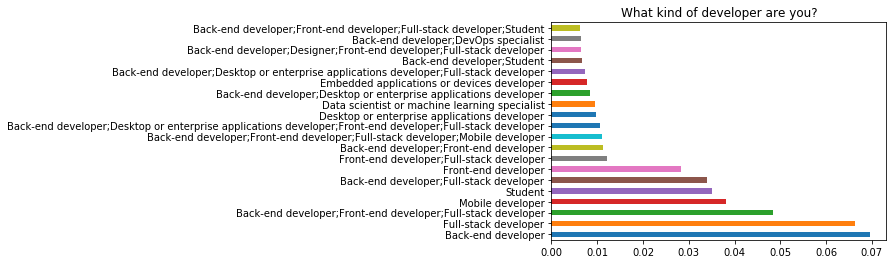

In [9]:
devtype_vals = df.DevType.value_counts()

(devtype_vals[:20]/devtype_vals.sum()).plot(kind="barh");
plt.title("What kind of developer are you?");

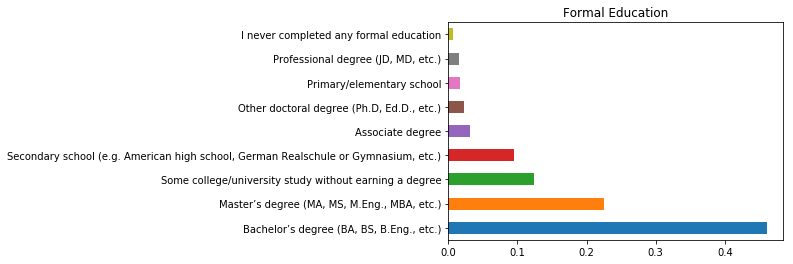

In [10]:
ed_vals = df.FormalEducation.value_counts()

(ed_vals/ed_vals.sum()).plot(kind="barh");
plt.title("Formal Education");

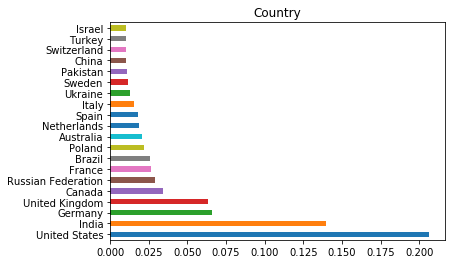

In [11]:
country_vals = df.Country.value_counts()

(country_vals[:20]/country_vals.sum()).plot(kind="barh");
plt.title("Country");

In [12]:
df.groupby('DevType').agg({'DevType': ['count'], 'ConvertedSalary': ['mean']}).sort_values([('DevType', 'count')])[-20:]
# devtypes = list(devtype_vals[:20].index)
# df['DevType'].apply(lambda x: x in devtypes)

,DevType,ConvertedSalary
,count,mean
DevType,,
Back-end developer;Front-end developer;Full-stack developer;Student,567,48943.343750
Back-end developer;DevOps specialist,593,120318.856777
Back-end developer;Designer;Front-end developer;Full-stack developer,597,80731.138710
Back-end developer;Student,624,36442.761905
Back-end developer;Desktop or enterprise applications developer;Full-stack developer,677,99204.815315
Embedded applications or devices developer,708,102176.391608
Back-end developer;Desktop or enterprise applications developer,779,90325.827515
Data scientist or machine learning specialist,869,109903.787575


### 3. Prepare Data

In [13]:
cat_df = df.select_dtypes(include=['object'])

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

87

In [14]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            if col in ['DevType', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'FrameworkWorkedWith', 'IDE', 'Methodology', 'VersionControl']:
                dummy_s = df[col].str.split(";")
                dummy_df = pd.get_dummies(dummy_s.apply(pd.Series).stack(), prefix=col, prefix_sep='_', dummy_na=dummy_na).sum(level=0)
            else:
                dummy_df = pd.get_dummies(df[col], prefix=col, prefix_sep='_', dummy_na=dummy_na)
            
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), dummy_df], axis=1)
        except:
            continue

    return df

In [15]:
df_drop = df.drop(['Respondent', 'Salary'], axis=1)

df_new = create_dummy_df(df_drop, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show shape to assure it has a shape of (5009, 11938)
print(df_new.shape)

(98855, 57446)


In [16]:
df_new.head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,MilitaryUS_No,MilitaryUS_Yes,SurveyTooLong_The survey was an appropriate length,SurveyTooLong_The survey was too long,SurveyTooLong_The survey was too short,SurveyEasy_Neither easy nor difficult,SurveyEasy_Somewhat difficult,SurveyEasy_Somewhat easy,SurveyEasy_Very difficult,SurveyEasy_Very easy
0,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,...,0,0,1,0,0,0,0,0,0,1
1,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,...,0,0,1,0,0,0,0,1,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,0,1,0,0
4,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0,...,0,0,1,0,0,0,0,1,0,0


In [17]:
df_new.to_pickle('./data/developer_survey_2018/survey_results_public_cat.p')

### 4. Model Data

In [18]:
df_new = pd.read_pickle('./data/developer_survey_2018/survey_results_public_cat.p')

In [19]:
df_new_dropna = df_new.dropna(subset=['ConvertedSalary'], axis=0)

print(df_new_dropna.shape)

(47702, 57446)


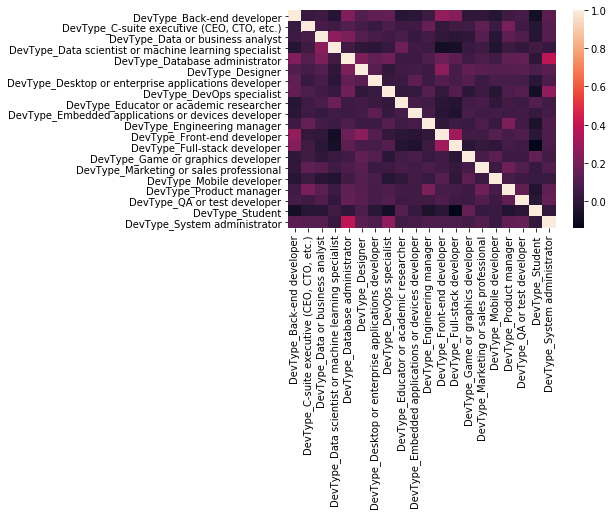

In [21]:
devtype = [col for col in df_new if col.startswith('DevType_')]
devtype_df = df_new[devtype]

sns.heatmap(devtype_df.corr(), xticklabels=True, yticklabels=True);

### 5. Results

In [48]:
for dt in devtype:
    print(df_new_dropna.groupby(dt)['ConvertedSalary'].mean())
    print()

DevType_Back-end developer
0.0    94099.377136
1.0    96609.911581
Name: ConvertedSalary, dtype: float64

DevType_C-suite executive (CEO, CTO, etc.)
0.0     94855.589879
1.0    117667.222840
Name: ConvertedSalary, dtype: float64

DevType_Data or business analyst
0.0     94605.553088
1.0    106542.401908
Name: ConvertedSalary, dtype: float64

DevType_Data scientist or machine learning specialist
0.0     95135.713843
1.0    101430.365400
Name: ConvertedSalary, dtype: float64

DevType_Database administrator
0.0    95257.735173
1.0    97767.508619
Name: ConvertedSalary, dtype: float64

DevType_Designer
0.0    96393.497266
1.0    89856.495811
Name: ConvertedSalary, dtype: float64

DevType_Desktop or enterprise applications developer
0.0    95538.857799
1.0    96060.245373
Name: ConvertedSalary, dtype: float64

DevType_DevOps specialist
0.0     92775.968458
1.0    115029.313948
Name: ConvertedSalary, dtype: float64

DevType_Educator or academic researcher
0.0    96106.216428
1.0    83182.155

### 6. Deploy